# Learning goals
- Data analysis
- Convolutional neural network
    

# Exploratory Data analysis (EDA)
based on https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html

Reference: https://www.kdnuggets.com/2019/06/7-steps-mastering-data-preparation-python.html and references therein

Using the Melbourne Housing snapshot dataset from kaggle to demonstrate how to perform a satisfactory exploratory data analysis. The dataset includes 21 columns (https://datawrapper.dwcdn.net/hHuXG/4/):
- Suburb
- Address
- Rooms
- Type 
- Price 
- Method 
- SellerG 
- Date
- Distance 
- Postcode 
- Bedroom2 
- Bathroom
- Car
- Landsize
- BuildingArea
- YearBuilt
- CouncilArea
- Lattitude
- Longtitude
- Regionname
- Propertycount

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# data preparation is essential before the analysis 
data = pd.read_csv('https://raw.githubusercontent.com/TMM-TUDA/data4python/main/melb_data.csv')

### Basic data set Exploration

In [2]:
#EDA-01: 
# The .shape attribute of a Pandas DataFrame gives an overall structure of the data. 
# It returns a tuple of length 2 that translates to how many rows of observations and columns 
# the dataset has.
data.shape # 13,580 observations and 21 features

(13580, 21)

In [3]:
#EDA-02: 
# The DataFrame’s .dtypes attribute displays the data types of the columns as a 
# Panda’s Series (Series means a column of values and their indices).
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
#EDA-03: 
# data.head()displays the first 5 observations, 
# data.tail() the last 5  
# data.sample() an observation chosen randomly from the dataset. 
# You can display 5 random observations using data.sample(5)
#data.head(10)
#data.tail(15)
data.sample(5) # random rows in the data

# What to look out for:
# Can you understand the column names? Do they make sense? (Check with the variable definitions again if needed)
# Do the values in these columns make sense?
# Are there significant missing values (NaN) sighted?
# What types of classes do the categorical features have?

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4497,Northcote,14 Jenkins St,3,h,1400000.0,S,McGrath,28/08/2016,5.5,3070.0,3.0,1.0,2.0,582.0,NaN,1932.0,Darebin,-37.76510,145.00620,Northern Metropolitan,11364.0
8262,Preston,263 Tyler St,4,h,1200000.0,S,RW,8/04/2017,8.8,3072.0,4.0,3.0,2.0,466.0,NaN,NaN,Darebin,-37.73100,145.01150,Northern Metropolitan,14577.0
6571,Windsor,4/12 Ellesmere Rd,2,u,800000.0,S,Fletchers,7/05/2016,5.1,3181.0,2.0,1.0,1.0,0.0,92.0,1930.0,Port Phillip,-37.85770,145.00020,Southern Metropolitan,4380.0
1124,Brighton,823 Hampton St,4,h,2475000.0,VB,Marshall,19/11/2016,11.2,3186.0,4.0,2.0,2.0,605.0,274.0,1920.0,Bayside,-37.91600,145.00640,Southern Metropolitan,10579.0
10283,Frankston,59 Summit Rd,3,h,740000.0,S,Harcourts,27/05/2017,38.0,3199.0,3.0,1.0,1.0,650.0,NaN,NaN,Frankston,-38.15882,145.12914,South-Eastern Metropolitan,17055.0


### Distribution: Numerical + categorical
 
This refers to how the values in a feature are distributed, or how often they occur. For numeric features, we’ll see how many times groups of numbers appear in a particular column, and for categorical features, the classes for each column and their frequency. We will use both graphs and actual summary statistics. The graphs enable us to get an overall idea of the distributions while the statistics give us factual numbers. These two strategies are both recommended as they complement each other.

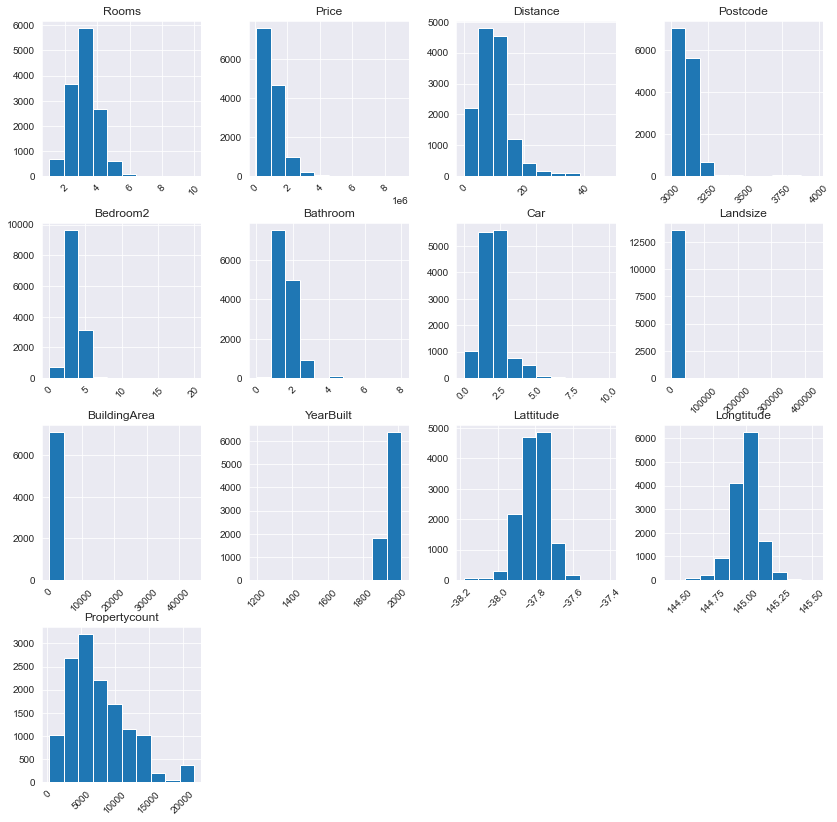

In [8]:
#EDA-04: Numeric feature using Pandas histogram 
# .hist() plots a histogram of the data’s numeric features in a grid.
data.hist(figsize=(14,14), xrot=45)
plt.show()

# What to look out for:
# Possible outliers that cannot be explained or might be measurement errors
# Numeric features that should be categorical. For example, Gender represented by 1 and 0.
# Boundaries that do not make sense such as percentage values > 100.

In [9]:
#EDA-05: Summary statistics of the numerical features
#use .describe()which displays their summary statistics
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
#EDA-06: Analysing categorical features
# use .describe(include=’object’)

# For categorical features, it is important to show the summary statistics before we plot graphs 
# because some features have a lot of unique classes (like we will see for the Address) 
# and the classes would be unreadable if visualized on a countplot.
data.describe(include='object')
#data.describe(include='all')

# the count of the values of each feature 
# the number of unique classes
# the top most frequent class, and how frequently that class occurs in the data set.

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


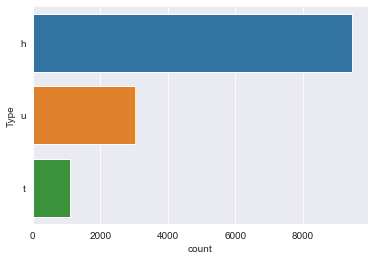

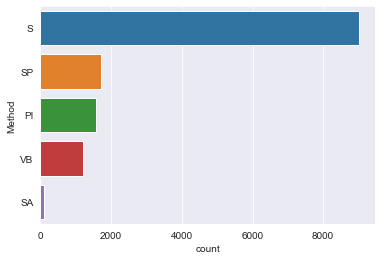

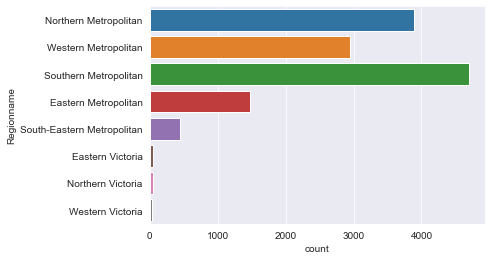

In [8]:
#EDA-07: Plotting categorical features 
# use the Seaborn countplot to plot such features
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

#What to look out for:
# Sparse classes which have the potential to affect a model’s performance.
# Mistakes in labeling of the classes, for example 2 exact classes with minor spelling differences.

### Grouping and segmentation
Segmentation allows us to cut the data and observe the relationship between categorical and numeric features.

In [10]:
#EDA-08: Segment the target variable by categorical features
# To compare the target feature, Price, between the various classes of our main 
# categorical features (Type, Method and Regionname) and see how the Price changes 
# with the classes.

# use the Seaborn boxplot which plots the distribution of Price across the classes of categorical features
# Tutorial on boxplot https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/

# mininum - smallest number 
# maximum - largest number 
# median - 50% elements smaller than it
# 1st quartile Q1 - 25% elements smaller than it
# 3rd quartile Q3 - 75% elements smaller than it 
# interquartile range (IQR) = Q3 - Q1
# outliars - > Q3+IQR or < Q1-IQR

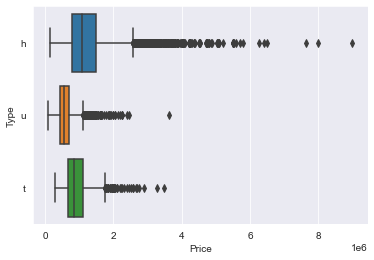

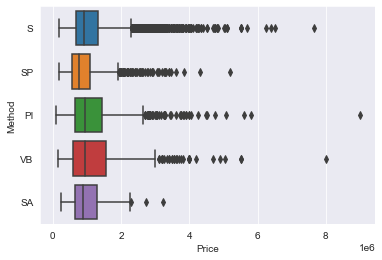

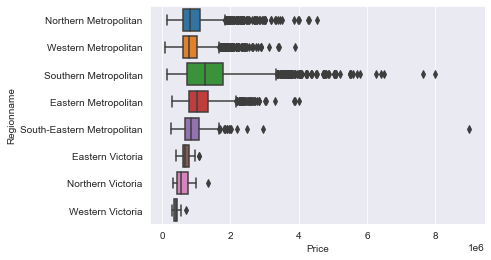

In [11]:
for column in data.select_dtypes(include='object'):
  if data[column].nunique() < 10:
    sns.boxplot(y=column, x='Price', data=data)
    plt.show()

# What to look out for:
# which classes most affect the target variables

In [12]:
#EDA-09: Group numeric features by each categorical feature
# To check how all the other numeric features, not just Price, change with each categorical feature 
# by summarizing the numeric features across the classes. 

# use the Dataframe’s groupby function to group the data by a category 
# and calculate a metric (such as mean, median, min, std, etc) across the various numeric features.
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


### Relationships between numeric features 

A correlation is a value between -1 and 1 that amounts to how closely values of two separate features move simultaneously. A positive correlation means that as one feature increases the other one also increases, while a negative correlation means one feature increases as the other decreases. Correlations close to 0 indicate a weak relationship while closer to -1 or 1 signifies a strong relationship (cf. https://www.mathsisfun.com/data/correlation.html)

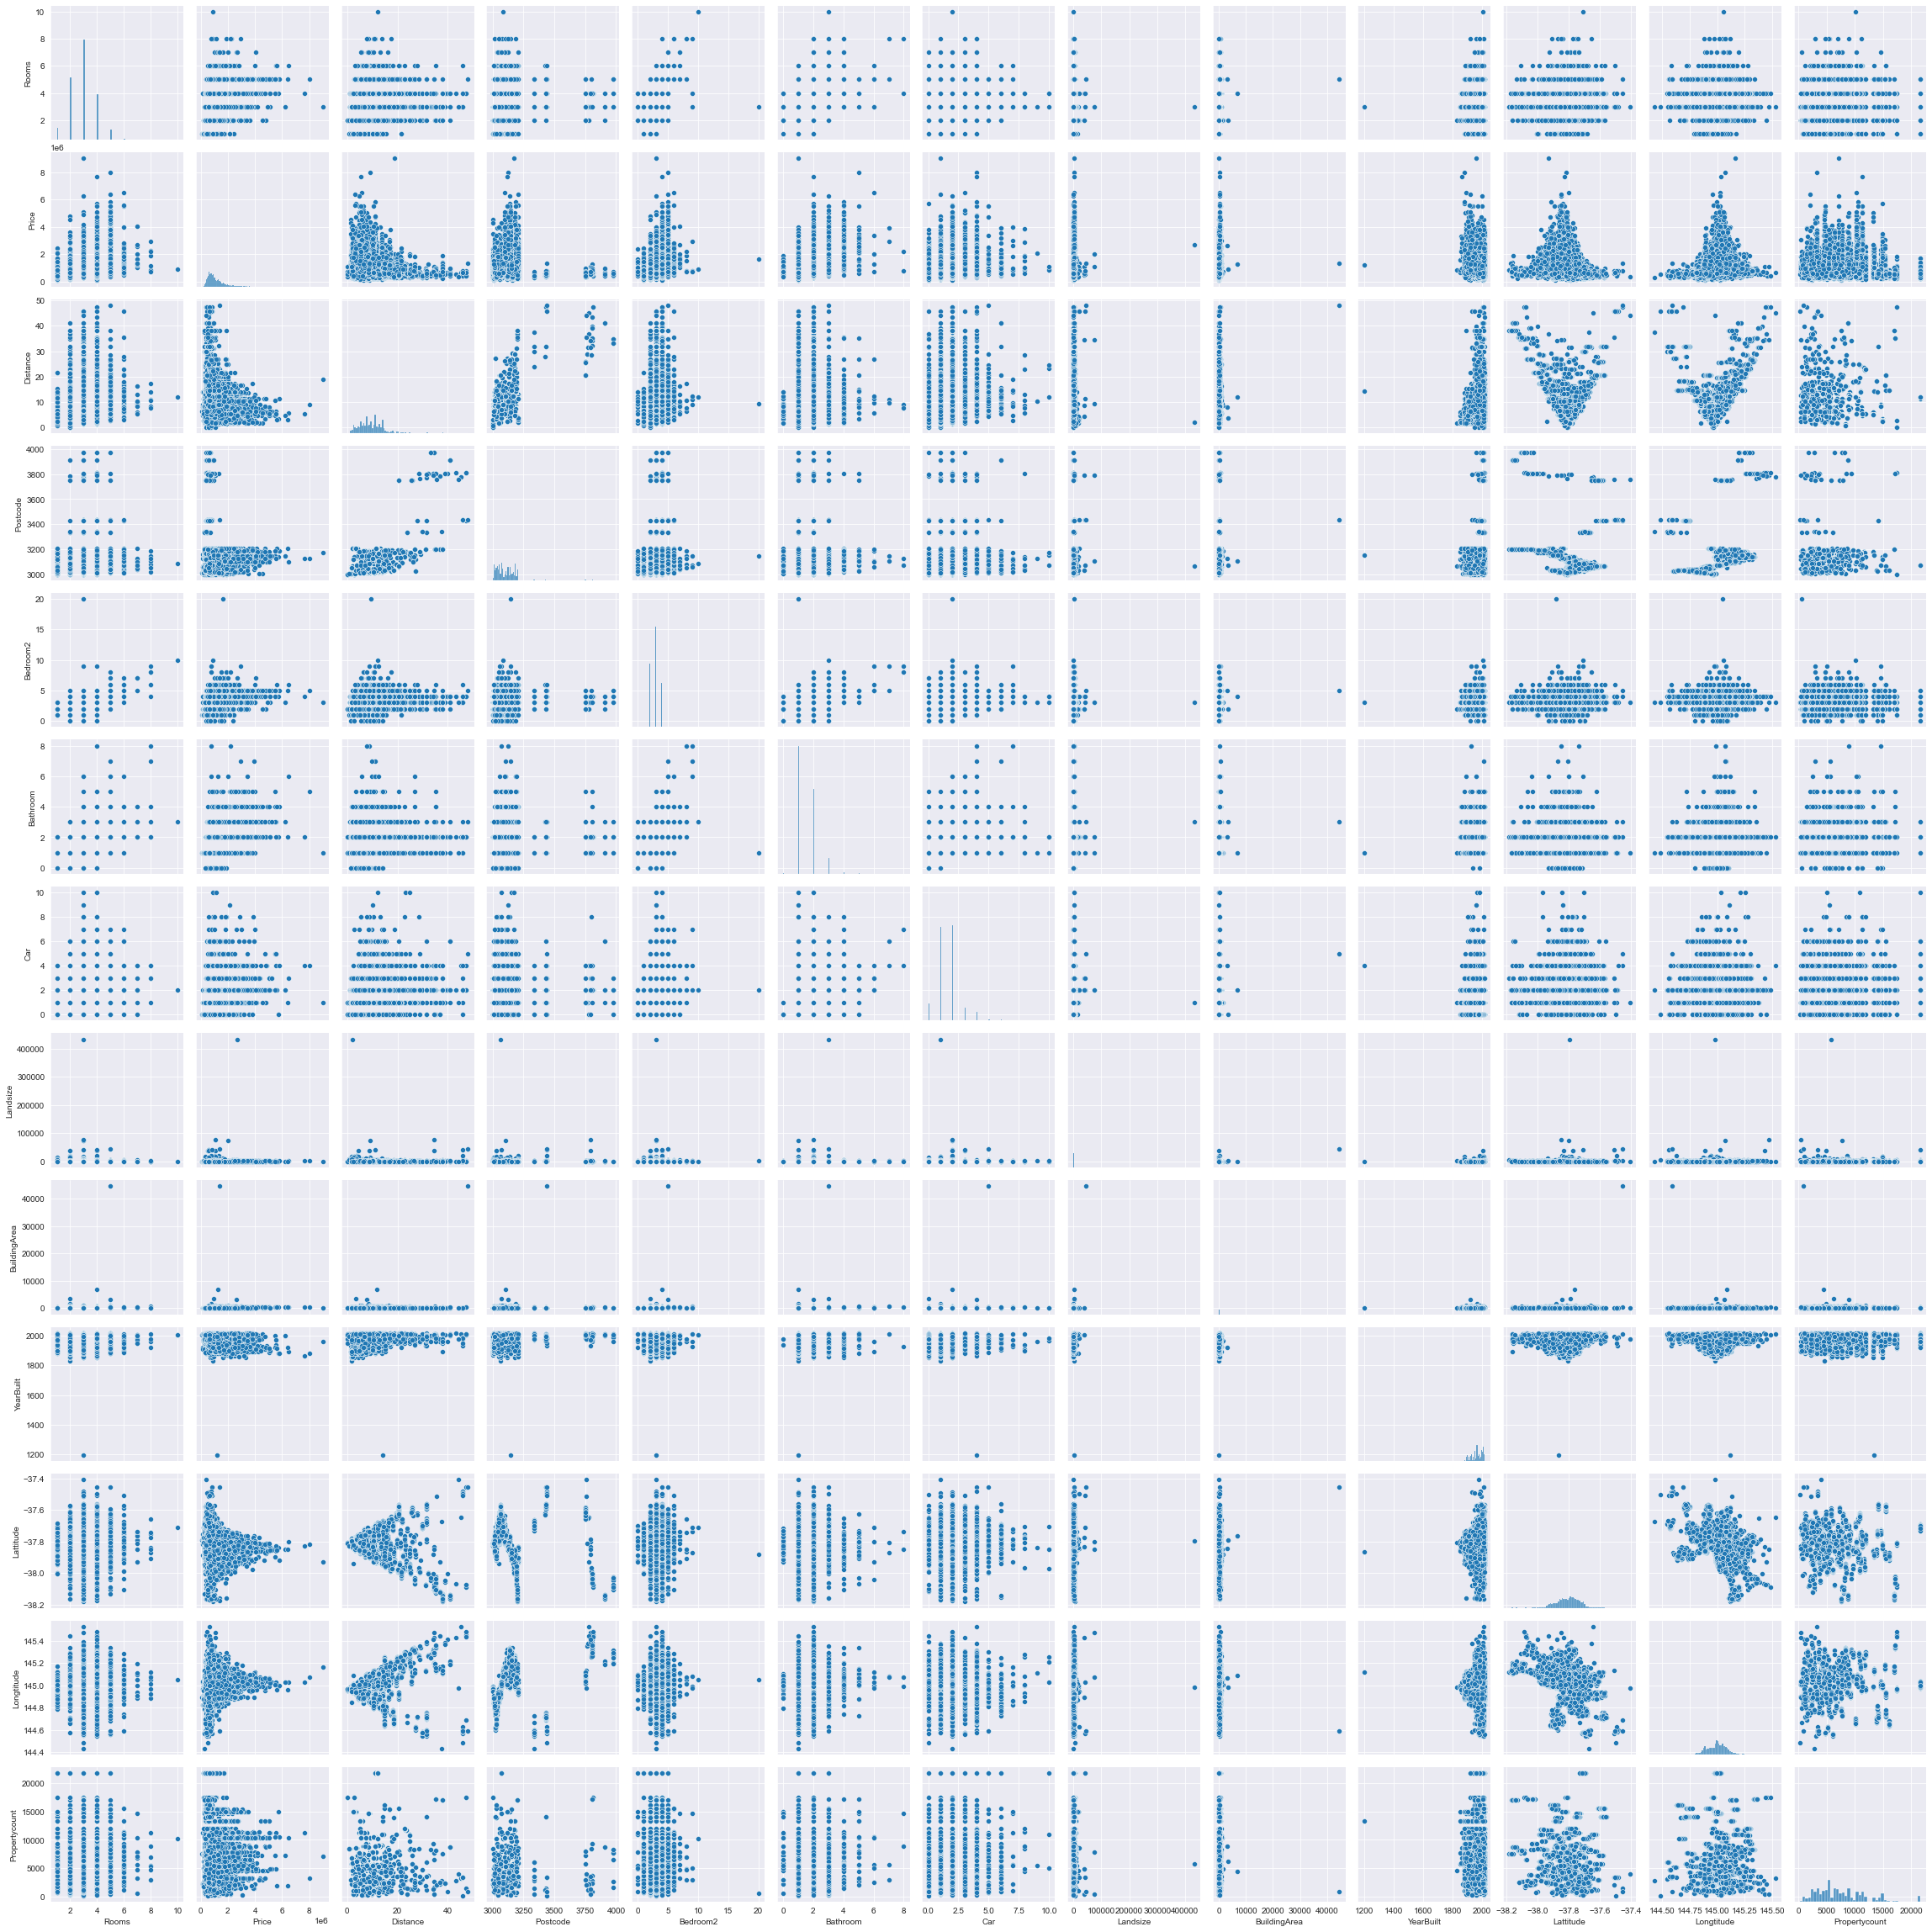

In [16]:
# Bivariate distribution plots help to study the relationship between two 
# variables by analyzing the scatter plot.
sns.pairplot(data)

In [17]:
#EDA-10: Correlations matrix for the different numerical features
# use .corr() to calculate the correlations between the numeric features and it returns a DataFrame.
corrs = data.corr()
corrs

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


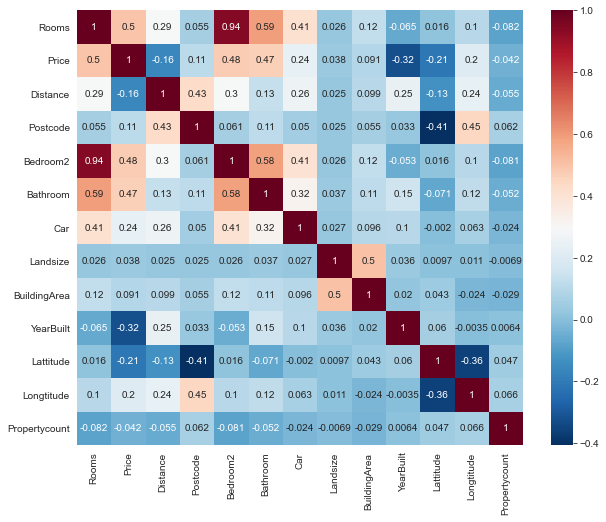

In [18]:
#EDA-11: Heatmap of the correlations
# use a Seaborn heatmap to plot the grid as a rectangular color-coded matrix. 
# use sns.heatmap(corrs, cmap=’RdBu_r’,annot=True).
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# What to look out for:

# Strongly correlated features; either dark red (positive) or dark blue(negative).
# Target variable; If it has strong positive or negative relationships with other features.

# Convolutional Neural Network
based on Machine Learning for Physicists 2021 https://pad.gwdg.de/s/Machine_Learning_For_Physicists_2021
- References 
    - A high-bias, low-variance introduction to Machine Learning for physicists https://physics.bu.edu/~pankajm/MLnotebooks.html
    - Best practices in machine learning for chemistry https://www.nature.com/articles/s41557-021-00716-z.pdf



[Sketch of a neural network](https://drive.google.com/uc?id=1B424PGEuPvuTY04ipA1r9uuO8djyyWBe)


In [15]:
from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display


### A neural network without hidden layers

A network with N0 input neurons and N1 output neurons (no hidden layer)

$$y^{\rm out}_j = f(\sum_k w_{jk} y^{\rm in}_k + b_j)$$

where $w$ is the weight matrix, $b$ is the bias vector, and $f$ would be the activation function (e.g. the sigmoid here), which is applied independently for each $j$.

In [16]:
N0=3 # input layer size
N1=2 # output layer size

# initialize random weights: array dimensions N1xN0
w=random.uniform(low=-1,high=+1,size=(N1,N0))
# initialize random biases: N1 vector
b=random.uniform(low=-1,high=+1,size=N1)

# input values
y_in=array([0.2,0.4,-0.1])
#y_in=array([0.2,0.4])

In [17]:
# evaluate network by hand, in two steps
z=dot(w,y_in)+b # result: the vector of 'z' values, length N1
y_out=1/(1+exp(-z)) # the 'sigmoid' function (applied elementwise)

In [18]:
print("network input y_in:", y_in)
print("weights w:", w)
print("bias vector b:", b)
print("linear superposition z:", z)
print("network output y_out:", y_out)

network input y_in: [ 0.2  0.4 -0.1]
weights w: [[-0.88620221 -0.73725752 -0.86221676]
 [-0.54164135 -0.39265918  0.40545451]]
bias vector b: [ 0.21396287 -0.37324491]
linear superposition z: [-0.17195891 -0.67918231]
network output y_out: [0.45711589 0.33644383]


In [19]:
# a function that applies the network
def apply_net(y_in):
    global w, b
    
    z=dot(w,y_in)+b 
    #print(z)
    return(1/(1+exp(-z)))

In [20]:
N0=2 # input layer size
N1=1 # output layer size

w=random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

In [21]:
print(w,b)
apply_net([0.8,0.3]) # a simple test

[[ 6.9541417  -2.75133916]] [0.61233439]


array([0.99527544])

In [22]:
M=50 # will create picture of size MxM
y_out=zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

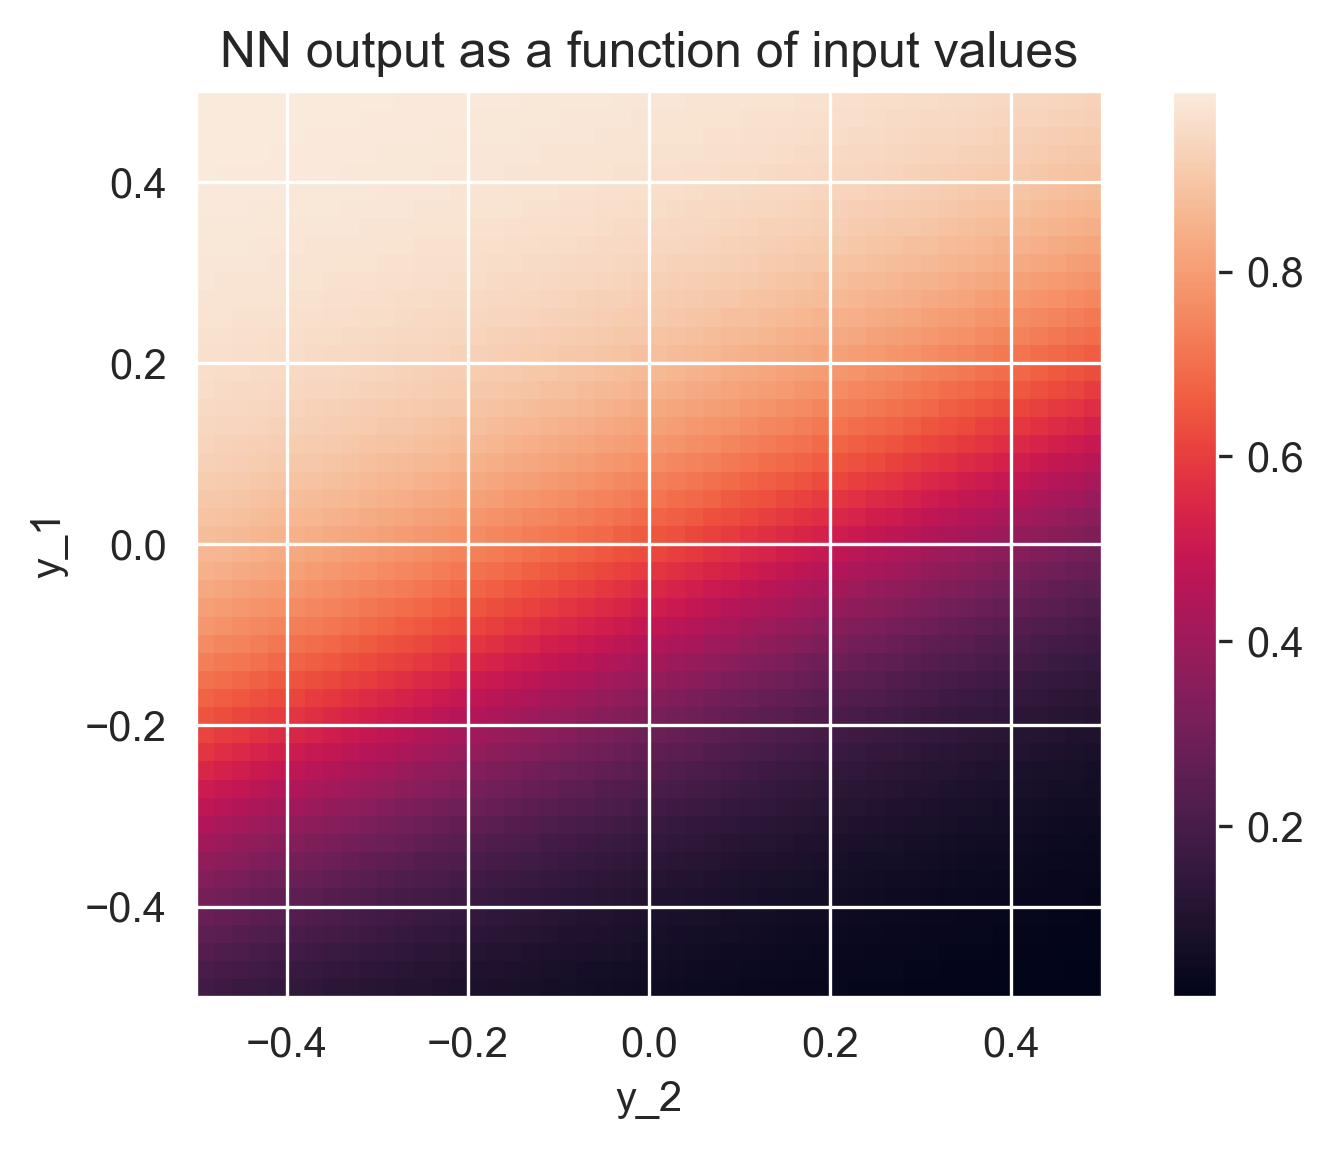

In [23]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

### A neural network with a hidden layer

The idea here is to have multiple weight matrices (for each pair of subsequent layers there is one weight matrix). The function that "applies a layer", i.e. goes from one layer to the next, is essentially the same as the function evaluating the simple network above.

In [24]:
# a function that evaluates one layer based
# on the neuron values in the preceding layer
def apply_layer(y_in,w,b): 
    z=dot(w,y_in)+b
    return(1/(1+exp(-z)))

In [25]:
N0=2 # input layer size
N1=30 # hidden layer size
N2=1 # output layer size

# weights and biases
# from input layer to hidden layer:
w1=random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b1=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# weights+biases from hidden layer to output layer:
w2=random.uniform(low=-10,high=+10,size=(N2,N1)) # random weights
b2=random.uniform(low=-1,high=+1,size=N2) # biases

In [26]:
# evaluate the network by subsequently
# evaluating the two steps (input to hidden and
# hidden to output)
def apply_net(y_in):
    global w1,b1,w2,b2
    
    y1=apply_layer(y_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

In [27]:
# Again, obtain values for a range of inputs
# Note: this is NOT the most efficient way to do this! (but simple)

M=50 # will create picture of size MxM
y_out=zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

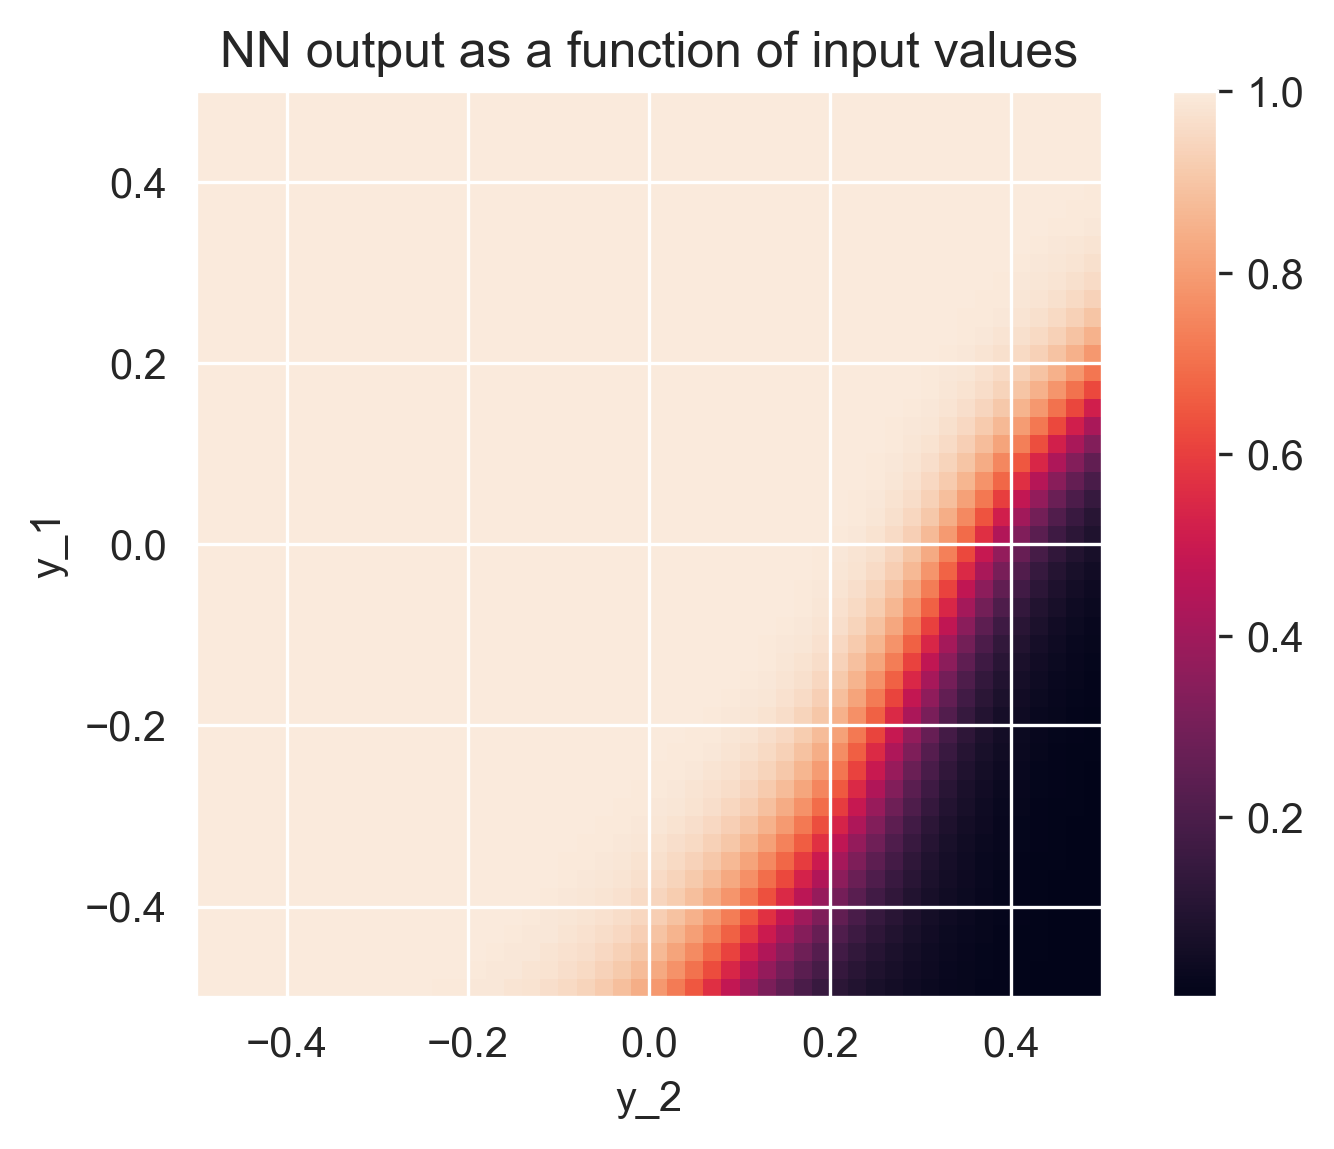

In [28]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

*italicized text*### A neural network with many hidden layers

In [29]:
def apply_layer_new(y_in,w,b): # a function that applies a layer    
    z=dot(y_in,w)+b # note different order in matrix product!
    return(1/(1+exp(-z)))
    
def apply_net_new(y_in): # same as before, but with new layer function
    global w1,b1,w2,b2
    
    y1=apply_layer_new(y_in,w1,b1)
    y2=apply_layer_new(y1,w2,b2)
    return(y2)

In [30]:
Nlayers=20 # not counting the input layer & the output layer
LayerSize=100

Weights=random.uniform(low=-3,high=3,size=[Nlayers,LayerSize,LayerSize])
Biases=random.uniform(low=-1,high=1,size=[Nlayers,LayerSize])

# for the first hidden layer (coming in from the input layer)
WeightsFirst=random.uniform(low=-1,high=1,size=[2,LayerSize])
BiasesFirst=random.uniform(low=-1,high=1,size=LayerSize)

# for the final layer (i.e. the output neuron)
WeightsFinal=random.uniform(low=-1,high=1,size=[LayerSize,1])
BiasesFinal=random.uniform(low=-1,high=1,size=1)

In [31]:
def apply_multi_net(y_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers
    
    y=apply_layer_new(y_in,WeightsFirst,BiasesFirst)    
    for j in range(Nlayers):
        y=apply_layer_new(y,Weights[j,:,:],Biases[j,:])
    output=apply_layer_new(y,WeightsFinal,BiasesFinal)
    return(output)

In [32]:
# Generate a 'mesh grid', i.e. x,y values in an image
M=40
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

In [33]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

In [34]:
y_2D=reshape(y_out[:,0],[M,M]) # back to 2D image

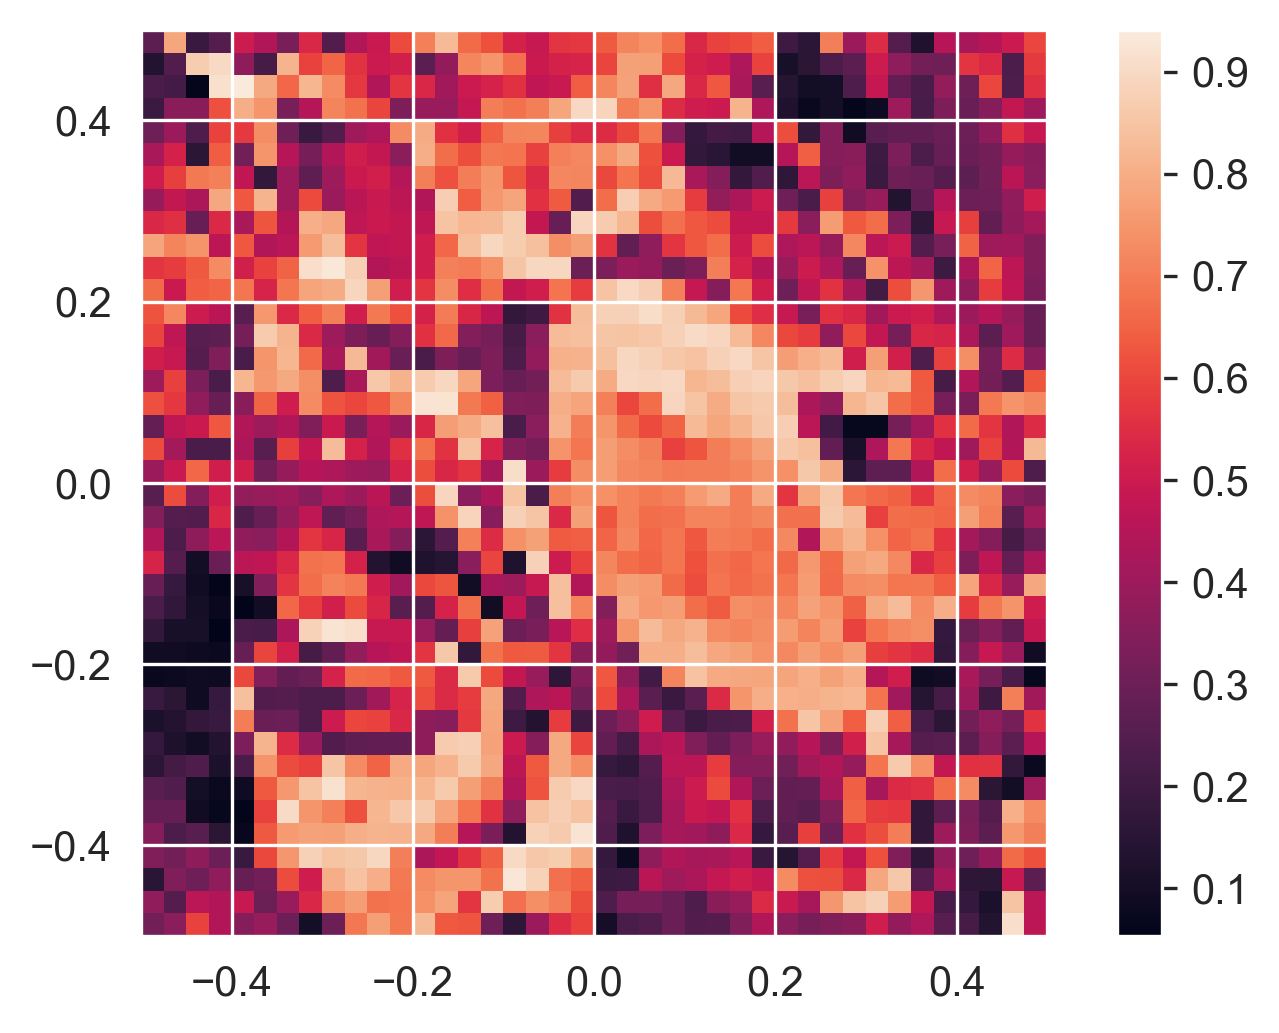

In [35]:
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.colorbar()
plt.show()

In [22]:
M=400
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

In [23]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

In [24]:
y_2D=reshape(y_out[:,0],[M,M]) # back to 2D image

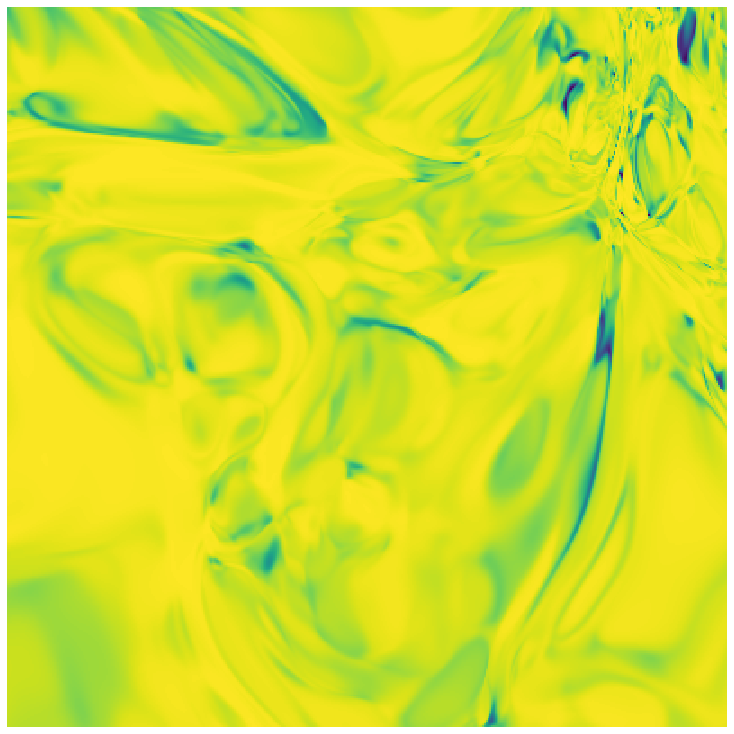

In [25]:
plt.figure(figsize=[10,10])
plt.axes([0,0,1,1]) # fill all of the picture with the image
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.axis('off') # no axes
plt.show()

### What to do next? 
- follow a tutorial (e.g., "Machine Learning for Physicists" by Florian Marquardt) to learn more --> convolution 
- learn how to use established packages, e.g., tensorflow, pytorch, ...
- quantum machine learning (what intrigues me the most!)
- training a neural network is converted to a optimization problem 

In [ ]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer

# array math:
import numpy as np

# plotting:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# Define network:
Net=Sequential() # creating a neural network!
Net.add(Dense(20,input_shape=(1,),activation="sigmoid")) # first hidden layer: 20 neurons (and 1 input neuron!)
Net.add(Dense(10,activation="sigmoid")) # second hidden layer: 10 neurons
Net.add(Dense(1,activation="linear")) # output layer: 1 neuron "relu"

# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='mean_squared_error',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent